<a href="https://colab.research.google.com/github/Siraj-s1/movie_recom/blob/main/HandwrittenDig_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(X_train,y_train) , (X_test ,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
len(X_train)

60000

In [8]:
X_train[0].shape

(28, 28)

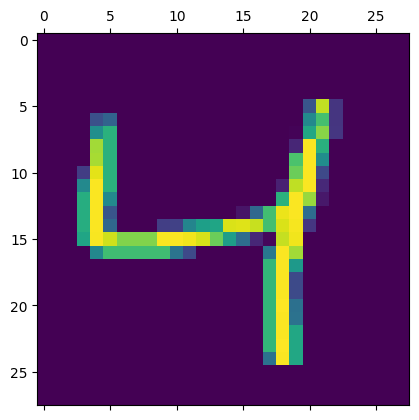

In [11]:
plt.matshow(X_train[2])

In [12]:
y_train[2]

4

In [14]:
X_train.shape

(60000, 28, 28)

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [22]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4684 - accuracy: 0.8793
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9157
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9209
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9260
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2616 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2583 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2559 - accuracy: 0.9292
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2526 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.251

In [25]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2648 - accuracy: 0.9271


[0.26479804515838623, 0.9271000027656555]

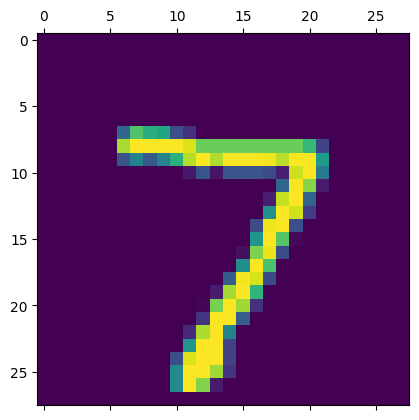

In [27]:
plt.matshow(X_test[0])

In [29]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.93186819e-03, 1.99237054e-08, 1.01498393e-02, 9.63802099e-01,
       1.20553514e-03, 1.11666165e-01, 2.55034696e-08, 9.99824882e-01,
       7.10267797e-02, 6.08688116e-01], dtype=float32)

In [30]:
np.argmax(y_predicted[0])

7

In [32]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [34]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    4,    6,    2,    1,    1],
       [   0, 1118,    3,    1,    0,    1,    4,    2,    6,    0],
       [   6,   10,  930,   17,    9,    3,   12,    8,   33,    4],
       [   3,    0,   17,  933,    0,   13,    2,   10,   21,   11],
       [   1,    2,    5,    2,  918,    0,    8,    4,    8,   34],
       [   9,    3,    2,   47,    9,  758,   15,    8,   35,    6],
       [  12,    3,    8,    1,    7,   10,  913,    1,    3,    0],
       [   1,    8,   22,    8,    7,    1,    0,  942,    2,   37],
       [   7,   13,    6,   25,    9,   19,    9,   10,  866,   10],
       [  10,    8,    1,   11,   23,    4,    0,   17,    5,  930]],
      dtype=int32)>

Text(33.22222222222222, 0.5, 'true')

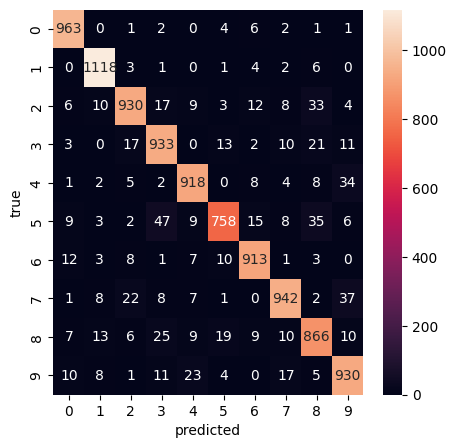

In [39]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('true')

In [41]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2430 - accuracy: 0.9283
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1060 - accuracy: 0.9677
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0742 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0591 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0467 - accuracy: 0.9848


In [42]:
model.evaluate(X_test_flattened,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0770 - accuracy: 0.9780


[0.07702906429767609, 0.9779999852180481]

In [43]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.2276850e-02, 1.2729125e-01, 8.7699616e-01, 6.7284614e-01,
       4.1960570e-04, 4.5609326e-04, 8.7642638e-06, 9.9998856e-01,
       3.5941729e-03, 1.2519263e-02], dtype=float32)

In [44]:
np.argmax(y_predicted[0])

7

In [45]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'tru')

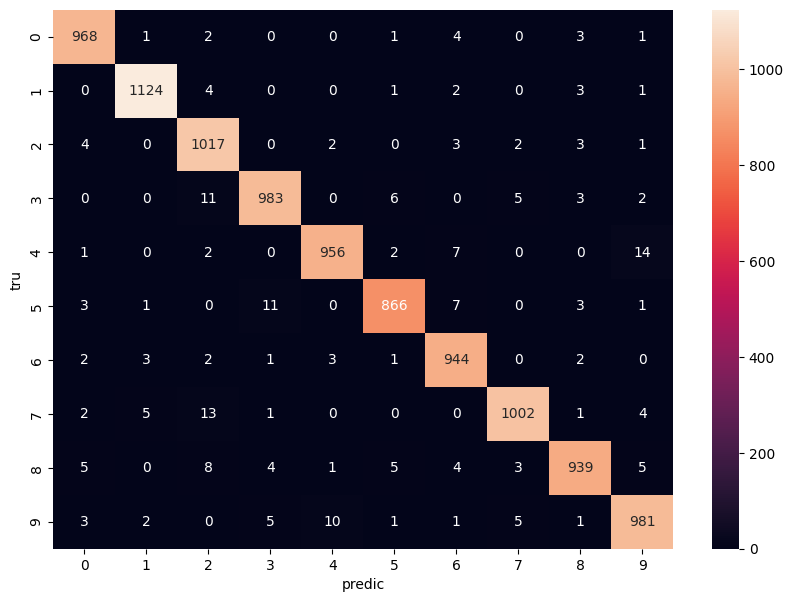

In [49]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predic')
plt.ylabel('tru')